In [14]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read in the data
students = pd.read_csv('Regression_data/test_data.csv')

# Fit the model
model = sm.OLS.from_formula('score ~ hours_studied', students)
results = model.fit()

# Calculate fitted values
fitted_values = results.predict(students)

# Calculate residuals
residuals = students.score - fitted_values

#### Normality assumption

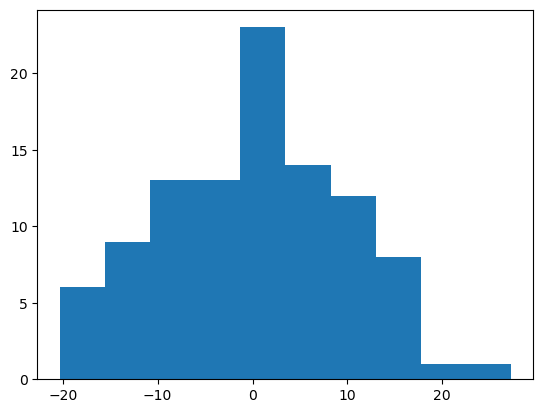

<Figure size 640x480 with 0 Axes>

In [17]:
# Plot a histogram of the residuals here:
plt.hist(residuals)

plt.show()
plt.clf()

In [9]:
from IPython.display import display, SVG

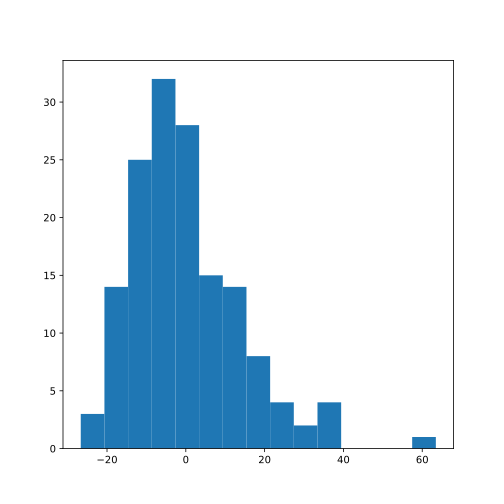

In [12]:
SVG("Regression_data/resids_not_normal.SVG")

#### Homoscedasticity assumption

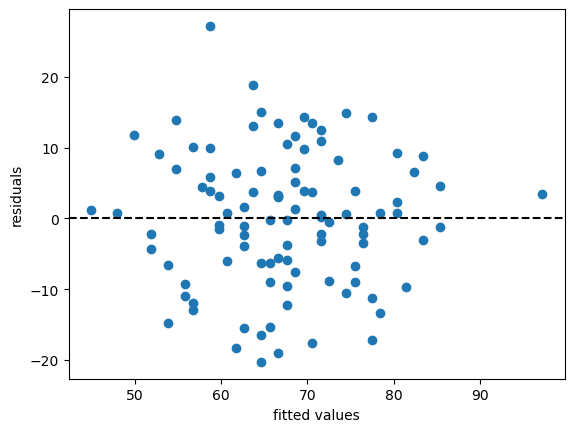

In [18]:
plt.scatter(x = fitted_values, y = residuals)
plt.xlabel('fitted values')
plt.ylabel('residuals')
plt.axhline(y = 0, color = 'black', linestyle = 'dashed')

plt.show()

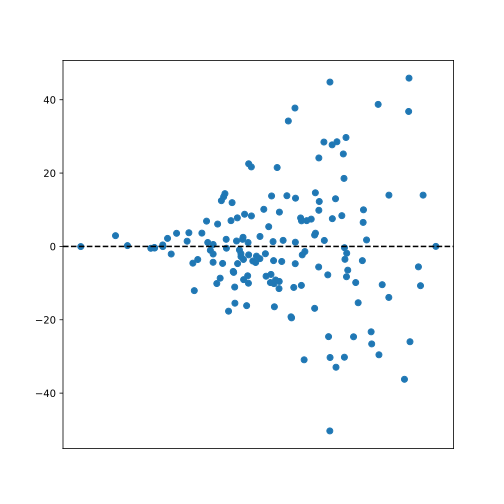

In [13]:
SVG("Regression_data/fittedvals_resids_pattern.SVG")

### Linear Regression using categorical predictors
Associations between categorical and quantiative varialbes,
where the dependent variable is quantiative

#### Review tasks for linear regression lesson 1

   time_seconds   age browser
0         486.0  47.1  Safari
1         645.7  64.6  Chrome
2         345.0  45.4  Safari
3         413.4  34.4  Chrome
4         426.4  31.3  Safari


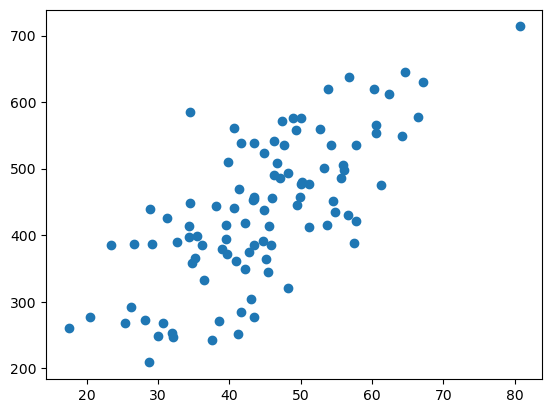

Intercept    128.967945
age            6.913758
dtype: float64


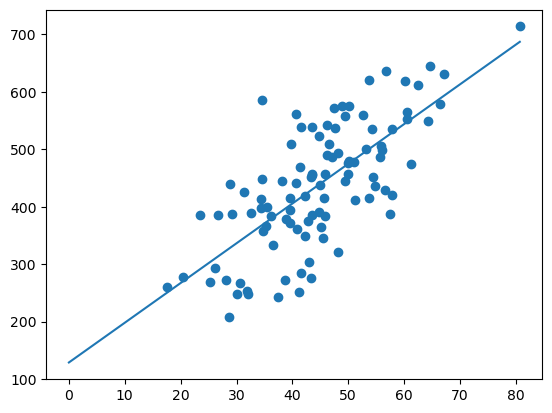

0      31.394072
1      70.103314
2     -97.852540
3      46.598794
4      81.031442
         ...    
95     26.983599
96     73.923848
97    -76.478413
98     94.550127
99   -124.138988
Length: 100, dtype: float64
Checking the normality assumpation


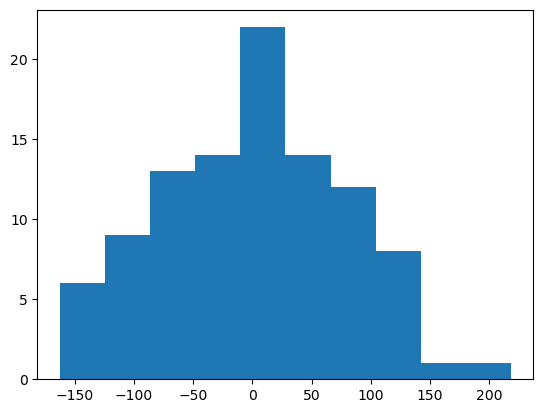

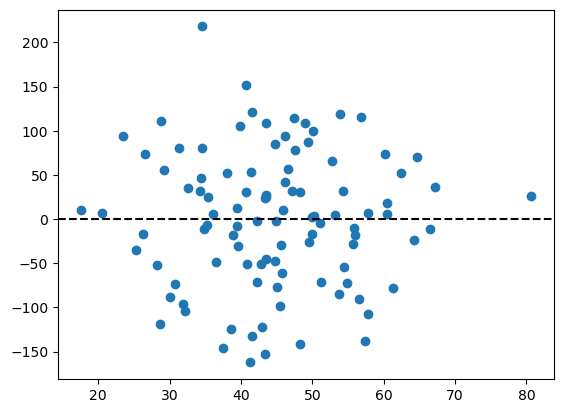

Prediction for 40 year old 405.5182489324498
Model 2 results
 Intercept            489.704255
browser[T.Safari]    -99.057086
dtype: float64
Mean of chrome 489.70425531914907 and safari 390.64716981132074 


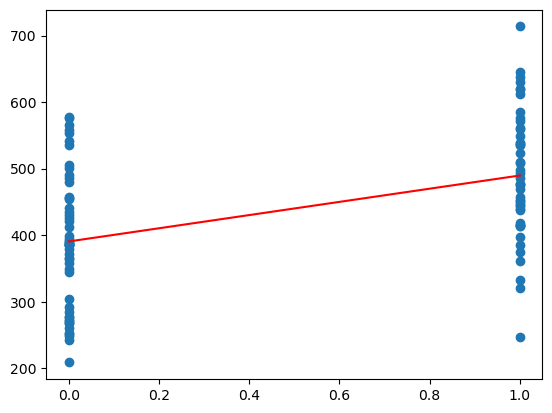

Mean difference per browser is 99.05708550782833


In [19]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read in the data
website = pd.read_csv('Regression_data/website.csv')

# Print the first five rows
print(website.head())

# Create a scatter plot of time vs age
plt.scatter(data = website, x = 'age', y = 'time_seconds')

# Show then clear plot
plt.show()
plt.clf()

# Fit a linear regression to predict time_seconds based on age
model = sm.OLS.from_formula('time_seconds ~ age', data = website)
results = model.fit()
print(results.params)
# Plot the scatter plot with the line on top
plt.scatter(data = website, x = 'age', y = 'time_seconds')
x1_x2, y1_y2 = [0, max(website.age)], [results.params[0], results.params[1] * max(website.age) + results.params[0]]

plt.plot(x1_x2, y1_y2) # 1. list for x_values, 2. list for y_values

# Show then clear plot
plt.show()
plt.clf()

# Calculate fitted values
fitted_values = results.predict(website.age)

# Calculate residuals
residuals = website.time_seconds - fitted_values
print(residuals) 

# Check normality assumption
print('Checking the normality assumpation')

plt.hist(residuals)
# Show then clear the plot
plt.show()
plt.clf()

# Check homoscedasticity assumption
plt.scatter(x = website.age, y = residuals)
plt.axhline(y = 0, color = 'black', linestyle = 'dashed')
# Show then clear the plot
plt.show()
plt.clf()

# Predict amount of time on website for 40 year old
def lin_pred(age_val):
    return results.params[0] + age_val * results.params[1]
print("Prediction for 40 year old {0}".format(lin_pred(40)))


# Fit a linear regression to predict time_seconds based on the browser
model2 = sm.OLS.from_formula('time_seconds ~ browser', data = website)
results2 = model2.fit()
print("Model 2 results\n",results2.params)
# Calculate and print the group means (for comparison)
mean_chr = np.mean(website[website.browser == 'Chrome'].time_seconds)
mean_sfr = np.mean(website[website.browser == 'Safari'].time_seconds)

print("Mean of chrome {} and safari {} ".format(mean_chr,mean_sfr))

# plot and clear the scatter plot for binary predictors
website_2 = website.replace({'Safari': 0, 'Chrome': 1}, inplace = False)
plt.scatter(data = website_2, x = 'browser', y = 'time_seconds')
plt.plot([0,1], [mean_sfr, mean_chr], color = 'red')
plt.show()

print("Mean difference per browser is {}".format(mean_chr - mean_sfr))


## Categorical predictors with multiple categories

In [33]:
rentals = pd.read_csv("Regression_data/streeteasy.csv")
rentals.drop(['rental_id','building_id', 'bedrooms', 'bathrooms','size_sqft','min_to_subway','floor'], axis = 1, inplace = True)
rentals.drop(['building_age_yrs', 'no_fee', 'has_roofdeck','has_washer_dryer','has_doorman', 'has_elevator'], axis = 1, inplace = True)
rentals.drop(['has_dishwasher','has_patio','has_gym','neighborhood','submarket'], axis = 1, inplace = True)
print(rentals.borough.unique())
rentals.head()

['Manhattan' 'Queens' 'Brooklyn']


,rent,borough
0,2550,Manhattan
1,11500,Manhattan
2,3000,Queens
3,4500,Manhattan
4,4795,Manhattan


### The X Matrix

In [35]:
import patsy
y, X = patsy.dmatrices('rent ~ borough', rentals)

# Print out the first 5 rows of X
print(X[0:5])

[[1. 1. 0.]
 [1. 1. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 0.]]


### Implementation and Interpretation

In [36]:
import statsmodels.api as sm
model = sm.OLS.from_formula('rent ~ borough', rentals).fit()
print(model.params)

Intercept               3327.403751
borough[T.Manhattan]    1811.536627
borough[T.Queens]       -811.256430
dtype: float64


In [37]:
print(rentals.groupby('borough').mean())

                  rent
borough               
Brooklyn   3327.403751
Manhattan  5138.940379
Queens     2516.147321


#### Changing the reference category

In [38]:
model = sm.OLS.from_formula('rent ~ C(borough, Treatment("Manhattan"))', rentals).fit()
print(model.params)

Intercept                                         5138.940379
C(borough, Treatment("Manhattan"))[T.Brooklyn]   -1811.536627
C(borough, Treatment("Manhattan"))[T.Queens]     -2622.793057
dtype: float64


# Multiple linear regression

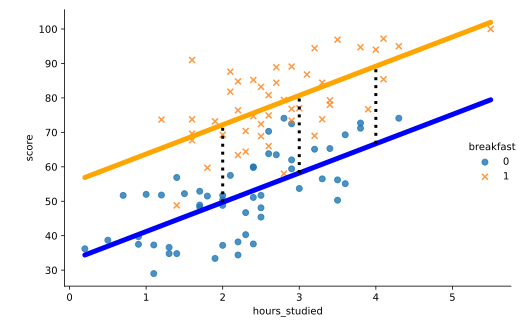

In [1]:
from IPython.display import SVG
SVG("Regression_data/MLR.SVG")

## Multiple Linear Regression with two quantitative predictors

### Applying MLR to detect confounders: coefficients may change, when additional predictors are added to the model

In [2]:
import pandas as pd
import statsmodels.api as sm

student = pd.read_csv('Regression_data/student.csv')

# Run regression with only math1 here:
simple = sm.OLS.from_formula('port3 ~ math1', data = student).fit()

# Run regression with math1 and port1 here:
multiple = sm.OLS.from_formula('port3 ~ math1 + port1', data = student).fit()
# Print the results of simple here:
print(simple.params)
# Print the results of multiple here:
print(multiple.params)

Intercept    3.627031
math1        0.484442
dtype: float64
Intercept    0.440159
math1        0.111161
port1        0.860927
dtype: float64


### Adding additional predictors and the simpson paradox

Intercept    1089.293718
expend        -20.892174
dtype: float64
Intercept    996.329849
expend        11.737303
takingR       -2.809061
dtype: float64

Mind that the visualization is made from sns
does not reflect the parameters of the model
used by OLS.from_formula()


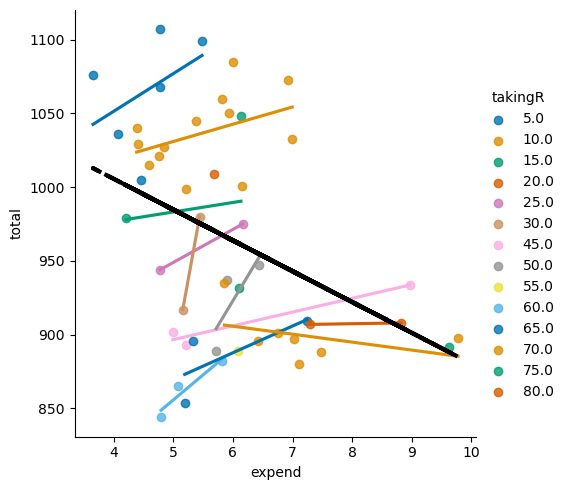

In [4]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

sat = pd.read_csv('Regression_data/sat.csv')
model0 = sm.OLS.from_formula('total ~ expend', data=sat).fit()

# Print simple regression coefficients:
print(model0.params)

# Run regression with takingR added:
model1 = sm.OLS.from_formula('total ~ expend + takingR', data=sat).fit()

# Print multiple regression coefficients:
print(model1.params)

print("\nMind that the visualization is made from sns\ndoes not reflect the parameters of the model\nused by OLS.from_formula()")
# Code for scatter plot:
sns.lmplot(x='expend', y='total', hue='takingR', palette='colorblind', ci=None, data=sat)
# Add regression line for model0 here:
plt.plot(sat.expend, model0.params[0] + model0.params[1] * sat.expend, color = 'black', linestyle = 'dashed', linewidth = 3)

plt.show() 

## Assumptions of Multiple Regression
When doing any type of statistical analysis, we should always keep the assumptions in mind. Multiple linear regression requires some of the same assumptions as simple linear regression:

    1. Linear functional form, which can be assessed by plotting the outcome variable against the predictor variable and looking for a linear relationship
    2. Normality, which can be assessed by plotting a histogram of the residuals and looking for an approximately normal distribution
    3. Homoscedasticity, which can be assessed by plotting residuals against fitted values and confirming that there is no clear pattern
    4. Multicollinearity: In addition, we also have to check that the predictors are not linearly related, which can lead to misleading results.

### Chekcing multicollinaerity

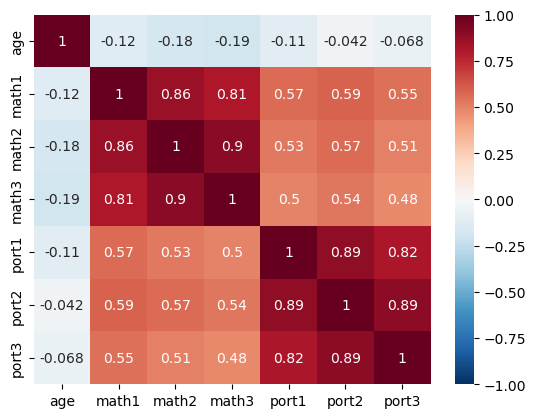

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

student = pd.read_csv('Regression_data/student.csv')

# Save correlations here:
corrs = student.corr()

# Plot heatmap here:
sns.heatmap(corrs, xticklabels = corrs.columns, yticklabels = corrs.columns, vmin = -1,center = 0, vmax = 1, cmap = 'RdBu_r', annot=True)

plt.show()

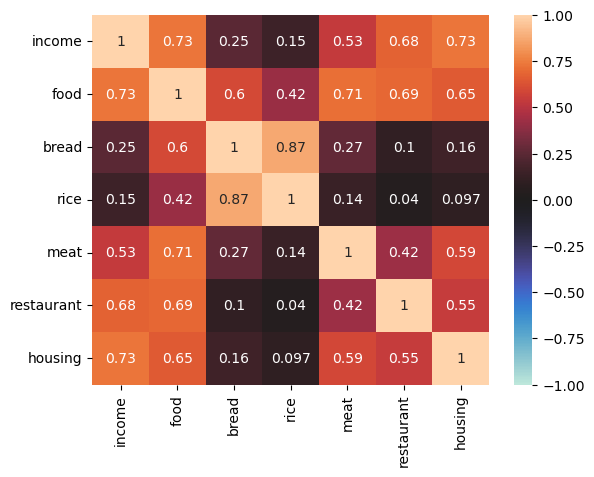

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     134.3
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           2.56e-48
Time:                        20:20:13   Log-Likelihood:                -1221.9
No. Observations:                 211   AIC:                             2452.
Df Residuals:                     207   BIC:                             2465.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

<Figure size 640x480 with 0 Axes>

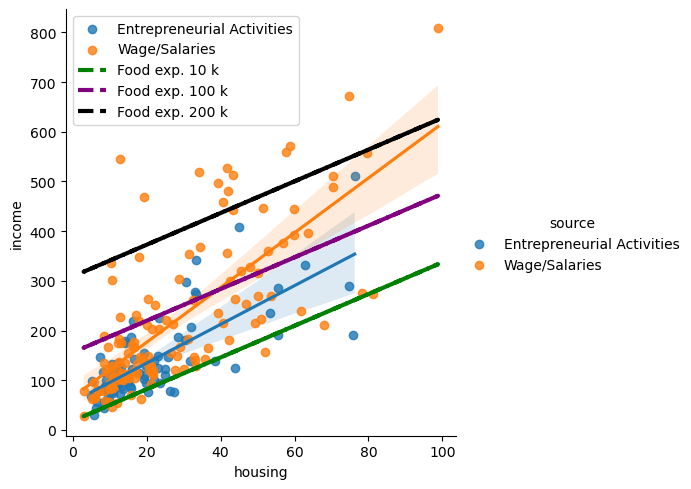

In [10]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

family = pd.read_csv('Regression_data/family.csv')

#create heat map here:
corrs = family.corr()
sns.heatmap(corrs, xticklabels = corrs.columns, yticklabels = corrs.columns, vmin = -1, center = 0, vmax = 1, annot=True)

plt.show()
plt.clf()
#fit model and view summary here:
multiple = sm.OLS.from_formula('income ~ food + housing + source', family).fit()
print(multiple.summary(), end = "\n"*3)
print(multiple.params)

# source_column: "Entrepreneurial Activities" is the reference category

#write out regression equation here:
# y = -26.81 + wage/salaries * 29.7 + food * 1.5 + housing * 3.19
# y = round(multiple.params[0],2) + round(multiple.params[1],2) * wage/salaries + round(multiple.params[2],2) * food + round(multiple.params[3],2) * housing
print(f"y = {round(multiple.params[0],2)} + {round(multiple.params[1],2)} * wage/salaries + {round(multiple.params[2],2)} * food + {round(multiple.params[3],2)} * housing")

#interpret intercept here:
# The average income of -26.8 thousand pesos, given an entreprenuerial activity as income source and zero expenditures for food and housing.

#interpret the coefficient on source here:
# Holding other predictors equal, it is the average increase of 29.7 thousands of pesos in income for an income source of wage/salary as compared to an income source of entrepreneurial activity.

#interpret the coefficient on food here:
# Holding other predictors equal, the average increase in income of 1.5 thousand pesos given one unit increase in food expenditure

#interpret the coefficient on housing here:
# Holding other predictors equal, it is the increase in income of 3.2 thousands of pesos given a one unit increase in housing expenditure.

#plot regression lines on scatter plot here:
sns.lmplot(x = 'housing', y = 'income', hue = 'source', data = family)
plt.plot(family.housing, round(multiple.params[0],2) + round(multiple.params[1],2) * 1 + round(multiple.params[2],2) * 10 + round(multiple.params[3],2) * family.housing, linestyle = 'dashed', color = 'green', linewidth = 3, label = 'Food exp. 10 k')
plt.plot(family.housing, round(multiple.params[0],2) + round(multiple.params[1],2) * 1 + round(multiple.params[2],2) * 100 + round(multiple.params[3],2) * family.housing, linestyle = 'dashed', color = 'purple', linewidth = 3, label = 'Food exp. 100 k')
plt.plot(family.housing, round(multiple.params[0],2) + round(multiple.params[1],2) * 1 + round(multiple.params[2],2) * 200 + round(multiple.params[3],2) * family.housing, linestyle = 'dashed', color = 'black', linewidth = 3, label = 'Food exp. 200 k')
plt.legend()
plt.show()

### Multiple linear model accounting for interactions

#### Binary and quantitative predictor

Model1 parameters:
 Intercept       6.953395
species[T.B]    0.714273
weight          1.992474
dtype: float64


Model2 parameters:
 Intercept              8.168619
species[T.B]          -3.580515
weight                 1.658621
weight:species[T.B]    1.115071
dtype: float64


Model3 parameters:
 Intercept              8.168619
species[T.B]          -3.580515
weight                 1.658621
species[T.B]:weight    1.115071
dtype: float64




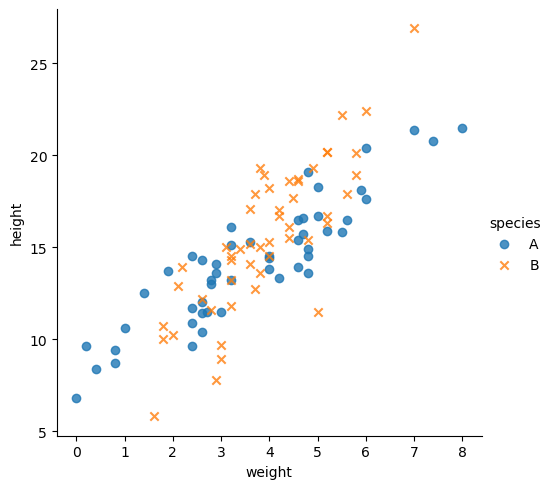

In [12]:
import pandas as pd
import statsmodels.api as sm

plants = pd.read_csv('Regression_data/plants.csv')
model1 = sm.OLS.from_formula('height ~ weight + species', data=plants).fit()

# Fit model2 regression here:
model2 = sm.OLS.from_formula('height ~ weight + species + weight:species', data=plants).fit()

model3 = sm.OLS.from_formula('height ~ weight + species + species:weight', data=plants).fit()

# Print model1 results here:
print("Model1 parameters:\n",model1.params, end="\n"*3)
# Print model2 results here:
print("Model2 parameters:\n",model2.params, end="\n"*3)

print("Model3 parameters:\n",model3.params, end="\n"*3)

# scatter plot
sns.lmplot(x='weight', y='height', hue='species', markers=['o','x'], fit_reg=False, data=plants)
plt.show()

#### Two quantiative predictors

Intercept           5.904379
water               1.860867
fertilizer         -1.196669
water:fertilizer    0.774034
dtype: float64


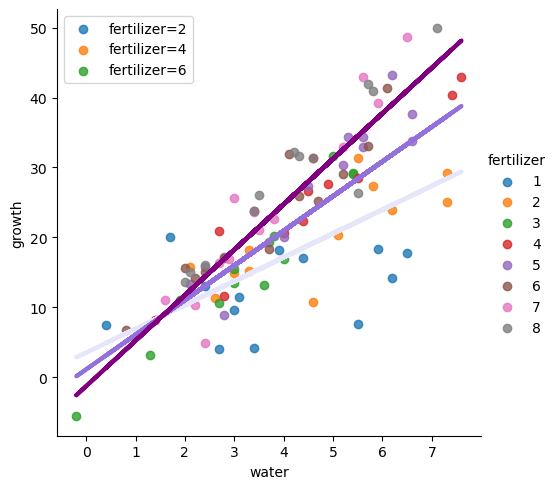

In [7]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

plants = pd.read_csv('Regression_data/plants.csv')
model = sm.OLS.from_formula('growth ~ water + fertilizer + water:fertilizer', data=plants).fit()

# Create scatter plot here:
sns.lmplot(x = 'water', y = 'growth', hue = 'fertilizer', data = plants, fit_reg=False)
print(model.params)
# Uncomment regression lines here:
plt.plot(plants.water, model.params[0] + model.params[1]*plants.water+ model.params[2]*2 + model.params[3]*plants.water*2, color='lavender', linewidth=3)
plt.plot(plants.water, model.params[0] + model.params[1]*plants.water+ model.params[2]*4 + model.params[3]*plants.water*4, color='mediumpurple', linewidth=3, label='fertilizer=4')
# Add third line here:
plt.plot(plants.water, model.params[0] + model.params[1]*plants.water+ model.params[2]*6 + model.params[3]*plants.water*6, color='purple', linewidth=3, label='fertilizer=6')

# Uncomment legend and display code here:
plt.legend(['fertilizer=2','fertilizer=4','fertilizer=6'])
plt.show()

### Polynomial models

Intercept    30.719176
light        -1.635004
dtype: float64 

Intercept             52.170841
light                 -7.371327
np.power(light, 2)     0.273966
dtype: float64


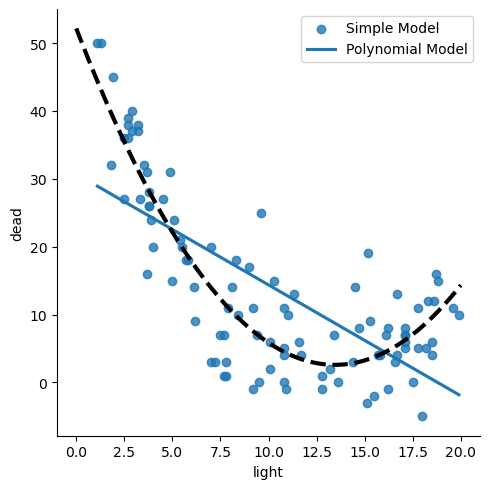

In [8]:
# fitting a polynomial line

import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

plants = pd.read_csv('Regression_data/plants.csv')

simple = sm.OLS.from_formula('dead ~ light', data=plants).fit()
polynomial = sm.OLS.from_formula('dead ~ light + np.power(light,2)', data=plants).fit()

# Print simple coefficients here:
print(simple.params, "\n")
# Print polynomial coefficients here:
print(polynomial.params)
# Uncomment scatter plot here:
sns.lmplot(x='light', y='dead', ci=None, data=plants)
x=np.linspace(0,20,100)
y=polynomial.params[0]+polynomial.params[1]*x+polynomial.params[2]*np.power(x,2)
# Add polynomial line here:
plt.plot(x, y, linestyle='dashed', color = 'black', linewidth = 3)
# Uncomment legend and display:
plt.legend(['Simple Model','Polynomial Model'])
plt.show()

### LOG transformation of the response (target/dependant variable)